In [ ]:
!pip install -q transformers>=4.32.0 datasets evaluate #Comes from HuggingFace
!pip install -q -U bitsandbytes                        # For quantization
!pip install -q -U peft                                # Parameter-efficient Fine-tuning
!pip install -q streamlit                              # For Deploying apps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade huggingface_hub                # To access hugginface

# Interface to query user input using best model (Model B in my case).

### Below is the implementation of interface which query user input with Model B and generates python code or function based on query.It uses streamlit for create and deploy a web application. The application is designed to be accessible over the internet, making it easy for users to interact with the language model and obtain code generation results. Image shows the interface

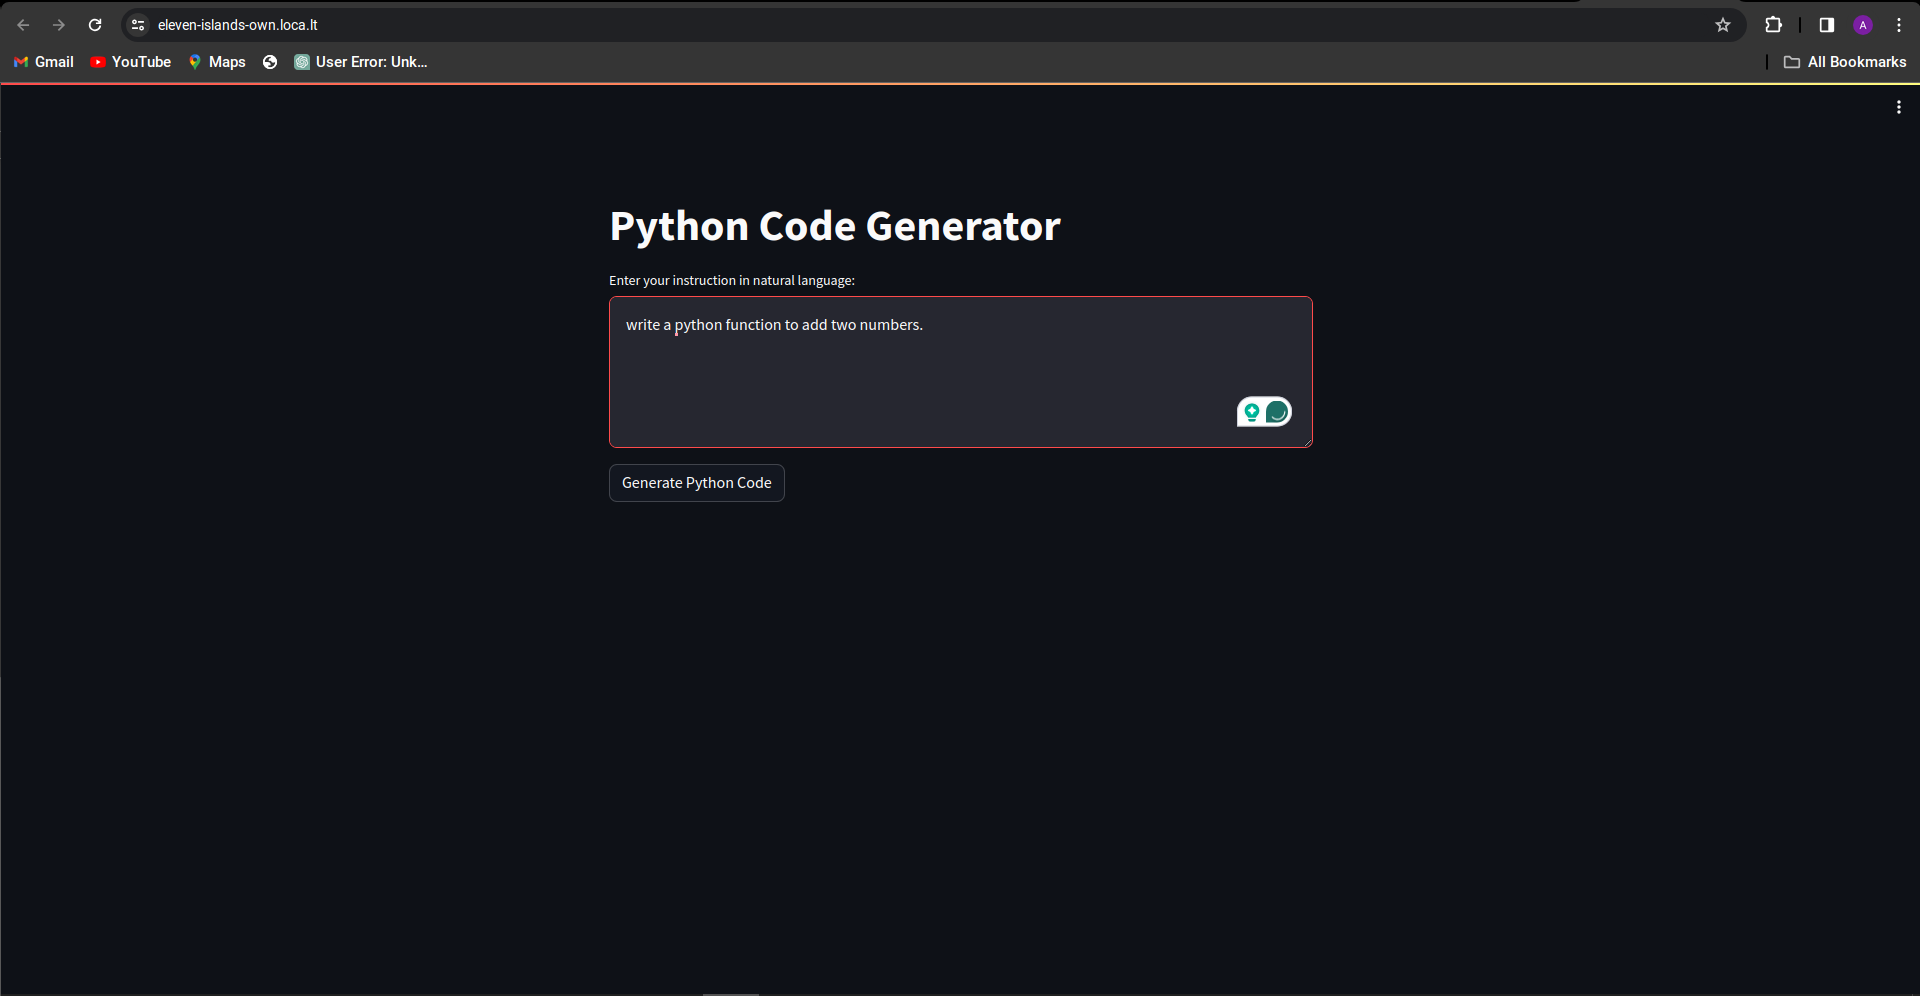

In [ ]:
from huggingface_hub import notebook_login
# Log in to HF Hub
notebook_login()

###The app_file_str variable contains the source code for a Streamlit web application. This app uses a pre-trained language model Model B and tokenizer (AutoTokenizer) to generate Python code based on user input. The app includes a function to format user instructions into a prompt that the model can understand and a function to generate code using the model's response.

In [ ]:
app_file_str = """
import streamlit as st
import torch
from peft import AutoPeftModelForCausalLM
from transformers import AutoTokenizer
# Load the model and tokenizer
huggingface_token = ''  # Replace with your actual token
model_repo = 'ashrianmol/Python-code-LLAMA-7B'
tuned_model = AutoPeftModelForCausalLM.from_pretrained(
    model_repo,
    low_cpu_mem_usage=True,
    torch_dtype=torch.float16,
    load_in_4bit=True,
    use_auth_token=huggingface_token
)
tokenizer = AutoTokenizer.from_pretrained(
    model_repo,
    use_auth_token=huggingface_token
)

# Define the format_instruction function
def format_instruction(instruction):
    formatted_instruction = instruction.strip() if isinstance(instruction, str) else ""
    return f\"\"\"### Instruction:
Use the Task below to write the Python function or code, which can solve the following task.

### Task:
{formatted_instruction}

### Python Function or Code:
\"\"\"

# Define the function to get the model's response
def get_response(user_input):
    prompt = format_instruction({'instruction': user_input})
    inputs = tokenizer(prompt, return_tensors='pt', padding=True, truncation=True, max_length=128)
    outputs = tuned_model.generate(**inputs.to(tuned_model.device), max_new_tokens=100)
    code = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return code

# Streamlit app frontend
def main():
    st.title("Python Code Generator")
    user_input = st.text_area("Enter your instruction in natural language:", height=150)
    generate_button = st.button("Generate Python Code")

    if generate_button and user_input:
        with st.spinner('Generating Python code...'):
            output = get_response(user_input)
            st.text_area("Generated Python Code:", output, height=300)

if __name__ == "__main__":
    main()
"""
with open("app.py", 'w') as file:
    # Write the code content to the file
    file.write(app_file_str)


###Install localtunnel to serve the Streamlit app

In [ ]:
!npm install --silent localtunnel

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.677s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


###Run the Streamlit app in the background

In [ ]:
!streamlit run app.py &>/content/logs.txt &

###Make the Streamlit app accessible on port 8501 and show its IP.

In [ ]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.90.83.217
npx: installed 22 in 1.948s
your url is: https://fair-dots-drive.loca.lt
